# Research Question 1: Do higher-income Asian countries exhibit less volatile GDP growth?

## Analysis: GDP Growth Volatility vs. Income Level

In [1]:
# Standard imports
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Regression
import statsmodels.api as sm

# Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings("ignore")

In [11]:
# Filter to 10 countries + years 1990–2023 & Keep relevant columns
df = pd.read_csv("asian_countries.csv")

countries = [
    'China','Japan','Korea, Rep.','Mongolia',
    'Indonesia','Malaysia','Philippines','Singapore','Thailand','Viet Nam'
]
df = df[df['country'].isin(countries) & df['year'].between(1990,2023)]
df = df[['country', 'year', 'gdp_per_capita', 'gdp_growth']]

In [12]:
# Compute avg_log_gdp
df['log_gdp'] = np.log(df['gdp_per_capita'])
avg_log = (
    df.groupby('country')['log_gdp']
      .mean()
      .reset_index()
      .rename(columns={'log_gdp':'avg_log_gdp'})
)

# Compute volatility of GDP growth
vol = (
    df.groupby('country')['gdp_growth']
      .std()
      .reset_index()
      .rename(columns={'gdp_growth':'volatility_gdp_growth'})
)

# Merge into a single table
metrics = avg_log.merge(vol, on='country')
display(metrics)

,country,avg_log_gdp,volatility_gdp_growth
0,China,8.243809,2.924949
1,Indonesia,7.801917,3.665497
2,Japan,10.394735,2.050458
3,"Korea, Rep.",9.937664,3.478950
4,Malaysia,8.918574,3.957337
5,Mongolia,7.787192,5.723041
6,Philippines,7.725617,3.263130
7,Singapore,10.646486,4.107995
8,Thailand,8.402949,4.030590
9,Viet Nam,7.423344,1.562314


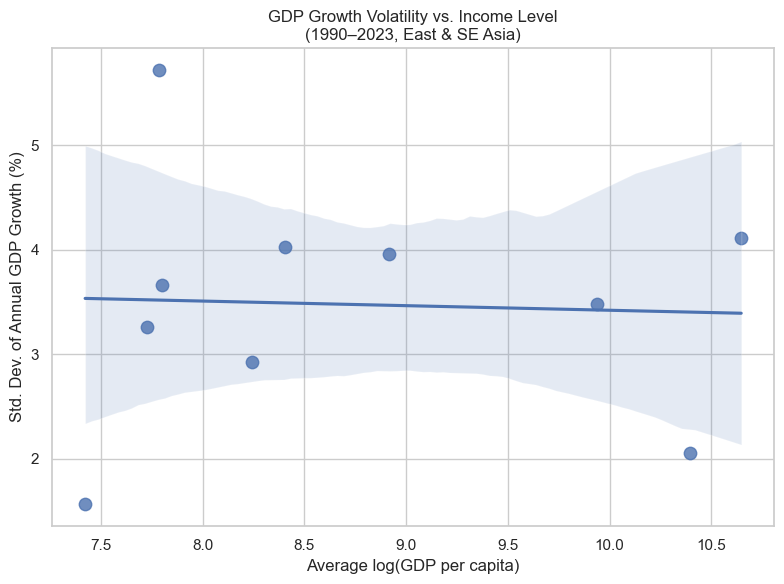

In [14]:
# Scatter + regression plot
plt.figure()
ax = sns.regplot(
    x='avg_log_gdp', y='volatility_gdp_growth',
    data=metrics, ci=95, scatter_kws={'s':80}
)
ax.set_title('GDP Growth Volatility vs. Income Level\n(1990–2023, East & SE Asia)')
ax.set_xlabel('Average log(GDP per capita)')
ax.set_ylabel('Std. Dev. of Annual GDP Growth (%)')
plt.tight_layout()
plt.show()

In [23]:
# OLS Regression
X = sm.add_constant(metrics['avg_log_gdp'])
y = metrics['volatility_gdp_growth']
model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     volatility_gdp_growth   R-squared:                       0.002
Model:                               OLS   Adj. R-squared:                 -0.123
Method:                    Least Squares   F-statistic:                   0.01641
Date:                   Sun, 27 Apr 2025   Prob (F-statistic):              0.901
Time:                           13:21:50   Log-Likelihood:                -15.119
No. Observations:                     10   AIC:                             34.24
Df Residuals:                          8   BIC:                             34.84
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.86

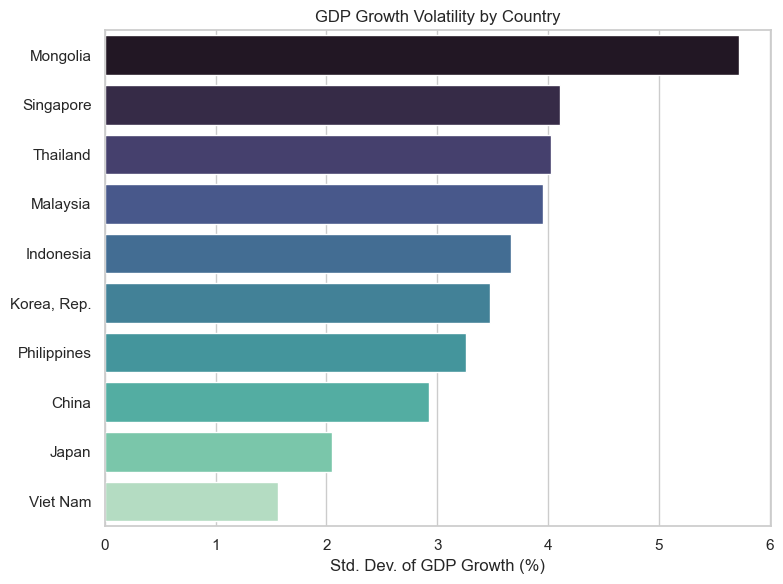

In [7]:
# Bar chart of volatility
plt.figure()
metrics_sorted = metrics.sort_values('volatility_gdp_growth', ascending=False)
sns.barplot(
    x='volatility_gdp_growth', y='country',
    data=metrics_sorted, palette='mako'
)
plt.title('GDP Growth Volatility by Country')
plt.xlabel('Std. Dev. of GDP Growth (%)')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Interpretation of Results

>1. **Scatter Plot & Regression Line**  
>    - The fitted line has a slight negative slope (β ≈ –0.044), suggesting that countries with higher average log GDP per capita tend to have marginally lower volatility in GDP growth.  
>    - However, the shaded 95 % confidence band is very wide and nearly flat, indicating substantial uncertainty about that relationship.

>2. **OLS Regression Table**  
>    - **Coefficient on `avg_log_gdp`:** –0.044 (for each one-unit increase in log GDP per capita, volatility falls by about 0.044 pp)  
>    - **p-value:** 0.901 — far above conventional significance levels (0.05), so we **cannot reject** the null hypothesis of zero slope.  
>    - **R²:** 0.002 — only 0.2 % of the cross-country variation in GDP-growth volatility is explained by average income.  
>    - **Conclusion:** There is **no statistically significant** evidence in this sample that richer East & Southeast Asian countries experience more stable growth.

>3. **Bar Chart of Volatility by Country**  
>    - **Most volatile:** Mongolia (≈ 5.8 pp), followed by Singapore (≈ 4.1 pp) and Thailand (≈ 4.0 pp).  
>    - **Least volatile:** Viet Nam (≈ 1.5 pp) and Japan (≈ 2.0 pp).  
>    - These country-specific differences likely reflect diverse economic structures:  
>      - **Mongolia’s** heavy reliance on mining exposes it to commodity price swings.  
>      - **Viet Nam** and **Japan** have more diversified, stable economies and macro-prudential frameworks.

---

**Key Takeaway:**  
In this group of ten East & Southeast Asian economies (1990–2023), **average income level is not a good predictor** of growth volatility. Instead, **country-specific factors**—such as resource dependence, economic diversification, and policy frameworks—appear to drive differences in stability.  

